In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os
import modules.hack as Hack
import re

from collections import Counter
from textblob import TextBlob
from typing import List

# 1. Đọc dữ liệu

In [3]:
reviews = pd.read_csv("./data/reviews.csv")

In [4]:
Counter(reviews['label'])

Counter({1: 260555, 0: 13840, -1: 3764})

# 2. Xóa các mẫu chứa url

In [5]:
reviews['contain_url'] = reviews['raw_comment'].apply(lambda comment: 1 if Hack.containsURL(comment.lower()) else 0)

In [6]:
reviews

,raw_comment,label,contain_url
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,0
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,0
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,0
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,0
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,0
...,...,...,...
278154,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1,0
278155,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,0
278156,Cũng ổn nhìn hay hay,0,0
278157,"nhỏ xíu , ship 2 tuần , thất vọng",1,0


In [7]:
reviews = reviews[reviews['contain_url'] == 0]
reviews = reviews.drop(columns=['contain_url']).reset_index(drop=True)

In [8]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
277584,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
277585,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
277586,Cũng ổn nhìn hay hay,0
277587,"nhỏ xíu , ship 2 tuần , thất vọng",1


# 3. Xóa các mẫu chỉ chứa mỗi comment là `ok`

In [9]:
reviews = reviews.loc[reviews['raw_comment'].str.lower() != "ok"]
reviews = reviews.reset_index(drop=True)

In [10]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
274799,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
274800,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
274801,Cũng ổn nhìn hay hay,0
274802,"nhỏ xíu , ship 2 tuần , thất vọng",1


# 4. Xóa các mẫu mà chữ IN HOA chiếm quá 50% độ dài của comment (khả năng cao là quảng cáo)

In [11]:
reviews['contain_adv'] = reviews['raw_comment'].apply(lambda comment: 1 if Hack.containAdvertisement(comment) else 0)

In [12]:
reviews

,raw_comment,label,contain_adv
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,0
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,0
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,0
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,0
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,0
...,...,...,...
274799,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1,0
274800,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,0
274801,Cũng ổn nhìn hay hay,0,0
274802,"nhỏ xíu , ship 2 tuần , thất vọng",1,0


In [13]:
reviews = reviews[reviews['contain_adv'] == 0]
reviews = reviews.drop(columns=['contain_adv']).reset_index(drop=True)

In [14]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
273832,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
273833,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
273834,Cũng ổn nhìn hay hay,0
273835,"nhỏ xíu , ship 2 tuần , thất vọng",1


# 5. Xóa các dòng không phải tiếng việt

In [15]:
syllables = Hack.loadVietnameseSyllables()

In [16]:
reviews['language'] = reviews['raw_comment'].apply(lambda comment: 1 if Hack.isVietnamese(comment, syllables) else 0)

In [17]:
reviews = reviews[reviews['language'] == 1]
reviews = reviews.drop(columns=['language']).reset_index(drop=True)

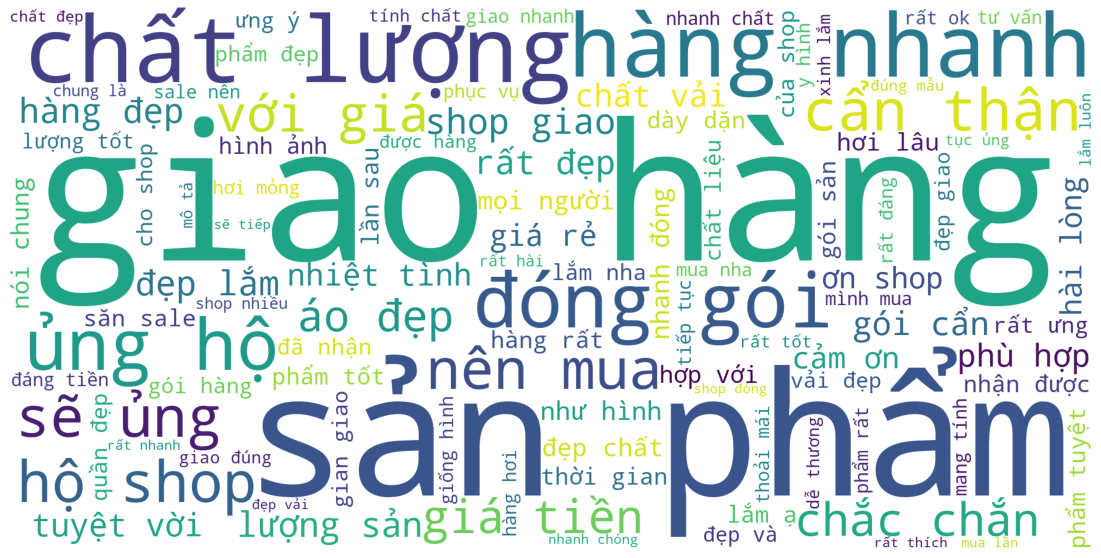

In [18]:
Hack.drawWordCloud(Hack.convertToOneString(reviews['raw_comment']))

# 6. Chuẩn lại các từ viết tắt

In [19]:
abbreviates = Hack.loadAbbreviate()
syllables = Hack.loadVietnameseSyllables()

In [20]:
reviews['comment'] = reviews['raw_comment'].apply(lambda comment: Hack.createCommentColumn(comment, syllables, abbreviates))

In [21]:
reviews

,raw_comment,label,comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng sức mong đợi luôn ạ quá đẹp luôn ai...
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải ngay và luôn h...
...,...,...,...
254941,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1,giao hàng quá chậm ngày mới có hàng sản phẩm t...
254942,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...
254943,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay
254944,"nhỏ xíu , ship 2 tuần , thất vọng",1,nhỏ xíu ship tuần thất vọng


In [23]:
reviews.to_csv("./data/comments.csv")